In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import matplotlib
import pandas as pd
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy
import gudhi
from astropy.cosmology import WMAP9 as cosmo
import pickle
import astroML

# from astroML.datasets import fetch_sdss_galaxy_colors
import ripser
import persim


%config InlineBackend.figure_format='retina'

In [3]:
# Fetch and prepare the data
from astroML.datasets import fetch_sdss_specgals
data = fetch_sdss_specgals()

In [4]:
df = pd.DataFrame(data)

In [5]:
df.shape

(661598, 43)

In [6]:
# Create a SkyCoord object with the given RA, DEC, and redshift
coord = SkyCoord(ra=df["ra"].values*u.degree, dec=df["dec"].values*u.degree, distance=cosmo.luminosity_distance(df["z"].values))

# Convert to Cartesian coordinates (x, y, z)
# in Mpc
x = coord.cartesian.x.value
y = coord.cartesian.y.value
z = coord.cartesian.z.value

In [7]:
# extract every 1000 so it doesn't take forever to do things
x_redu = x.copy()[::1000]
y_redu = y.copy()[::1000]
z_redu = z.copy()[::1000]

In [7]:
# data = np.arange(0, len(x))
# # Calculate the number of elements to extract (20%)
# num_elements = int(len(data) * 0.2)

# # Randomly choose indices of elements to extract
# selected_indices = np.random.choice(len(data), size=num_elements, replace=False)

# # Extract the selected elements
# x_redu = x[selected_indices]
# y_redu = y[selected_indices]
# z_redu = z[selected_indices]


In [8]:
y_redu.shape

(662,)

In [9]:
initial = [0, 100, 200, 300, 400, 500]
final = [100, 200, 300, 400, 500, 600]

usetex mode requires TeX.


(300,)
Alpha complex is of dimension  1  -  101  simplices -  100  vertices.
betti_numbers = [99]
Number of simplices=101
(300,)
Alpha complex is of dimension  1  -  102  simplices -  100  vertices.
betti_numbers = [98]
Number of simplices=102
(300,)
Alpha complex is of dimension  1  -  105  simplices -  100  vertices.
betti_numbers = [95]
Number of simplices=105
(300,)
Alpha complex is of dimension  2  -  110  simplices -  100  vertices.
betti_numbers = [94, 0]
Number of simplices=110
(300,)
Alpha complex is of dimension  3  -  139  simplices -  100  vertices.
betti_numbers = [82, 1, 0]
Number of simplices=139
(300,)
Alpha complex is of dimension  1  -  102  simplices -  100  vertices.
betti_numbers = [98]
Number of simplices=102


/tmp/ipykernel_3960/8580562.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


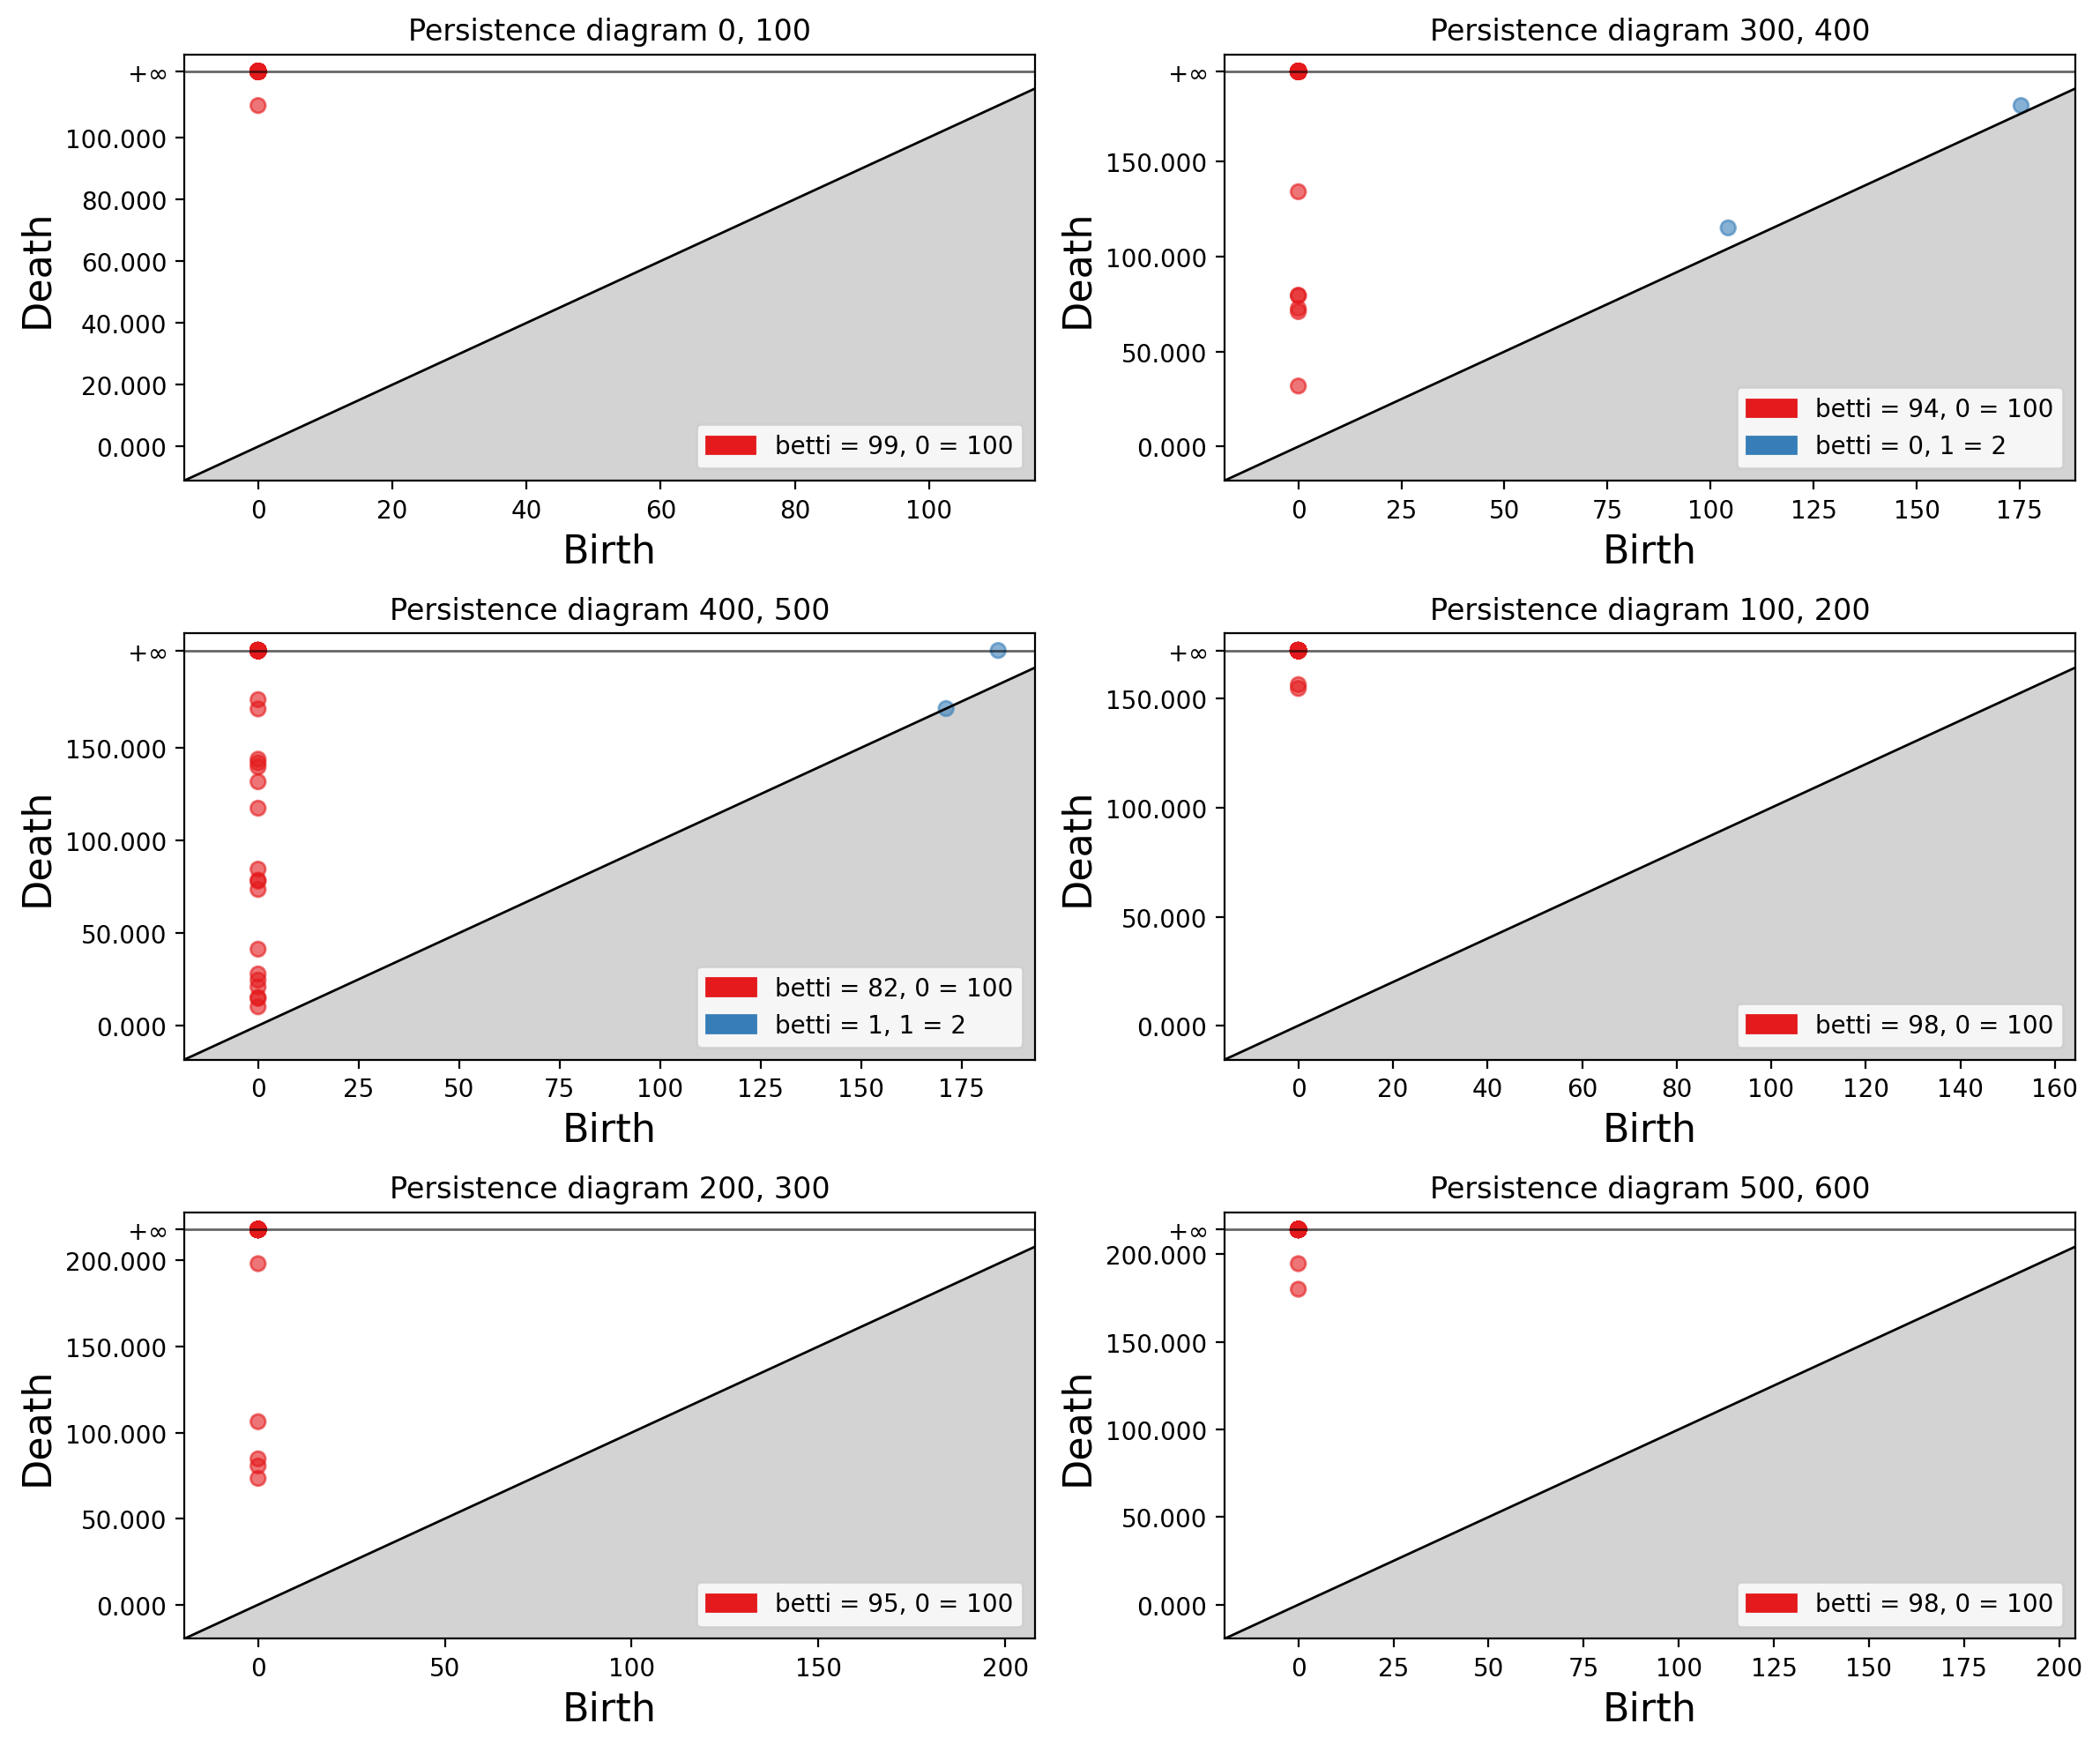

In [10]:
fig, axs = plt.subplots(3, 2, figsize = (12,10))
colormap = plt.cm.Set1.colors
points_d = np.vstack([x_redu, y_redu, z_redu]).reshape(662, 3)
for ini, f in zip(initial, final):
    # fig, axs = plt.subplots(3, 2)

    # print(points_d.shape)
    batch = points_d[ini:f, :]
    print(batch.flatten().shape)

    ac = gudhi.AlphaComplex(points = batch)

    simplex_tree = ac.create_simplex_tree(max_alpha_square = 200)
    print('Alpha complex is of dimension ', simplex_tree.dimension(), ' - ',
    simplex_tree.num_simplices(), ' simplices - ', simplex_tree.num_vertices(), ' vertices.')

    diag = simplex_tree.persistence()

    print("betti_numbers = %s"%(simplex_tree.betti_numbers()))

    counts = np.unique(np.array([dim for (dim, (birth, death)) in diag]), return_counts=True)
    gudhi.plot_persistence_diagram(diag, axes = axs[(ini//100)%3, (ini//100)%2])
    axs[(ini//100)%3, (ini//100)%2].set_title("Persistence diagram %s, %s"%((ini,f)))


    message = "Number of simplices=" + repr(simplex_tree.num_simplices())
    print(message)

    dimensions = {item[0] for item in diag}
    axs[(ini//100)%3, (ini//100)%2].legend(
    handles=[mpatches.Patch(color=colormap[dim], 
                            label= "betti = %s, %s = %s"%(simplex_tree.betti_numbers()[dim], dim, counts[1][dim])) for dim in dimensions], 
                            loc="best")

fig.tight_layout()
fig.show()


Alpha complex is of dimension  1  -  108  simplices -  100  vertices.
betti_numbers = [92]
Number of simplices=108
Alpha complex is of dimension  1  -  103  simplices -  100  vertices.
betti_numbers = [97]
Number of simplices=103
Alpha complex is of dimension  2  -  113  simplices -  100  vertices.
betti_numbers = [89, 0]
Number of simplices=113
Alpha complex is of dimension  3  -  135  simplices -  100  vertices.
betti_numbers = [87, 0, 0]
Number of simplices=135
Alpha complex is of dimension  3  -  260  simplices -  100  vertices.
betti_numbers = [73, 1, 0]
Number of simplices=260
Alpha complex is of dimension  2  -  120  simplices -  100  vertices.
betti_numbers = [83, 1]
Number of simplices=120


/tmp/ipykernel_3960/823343976.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


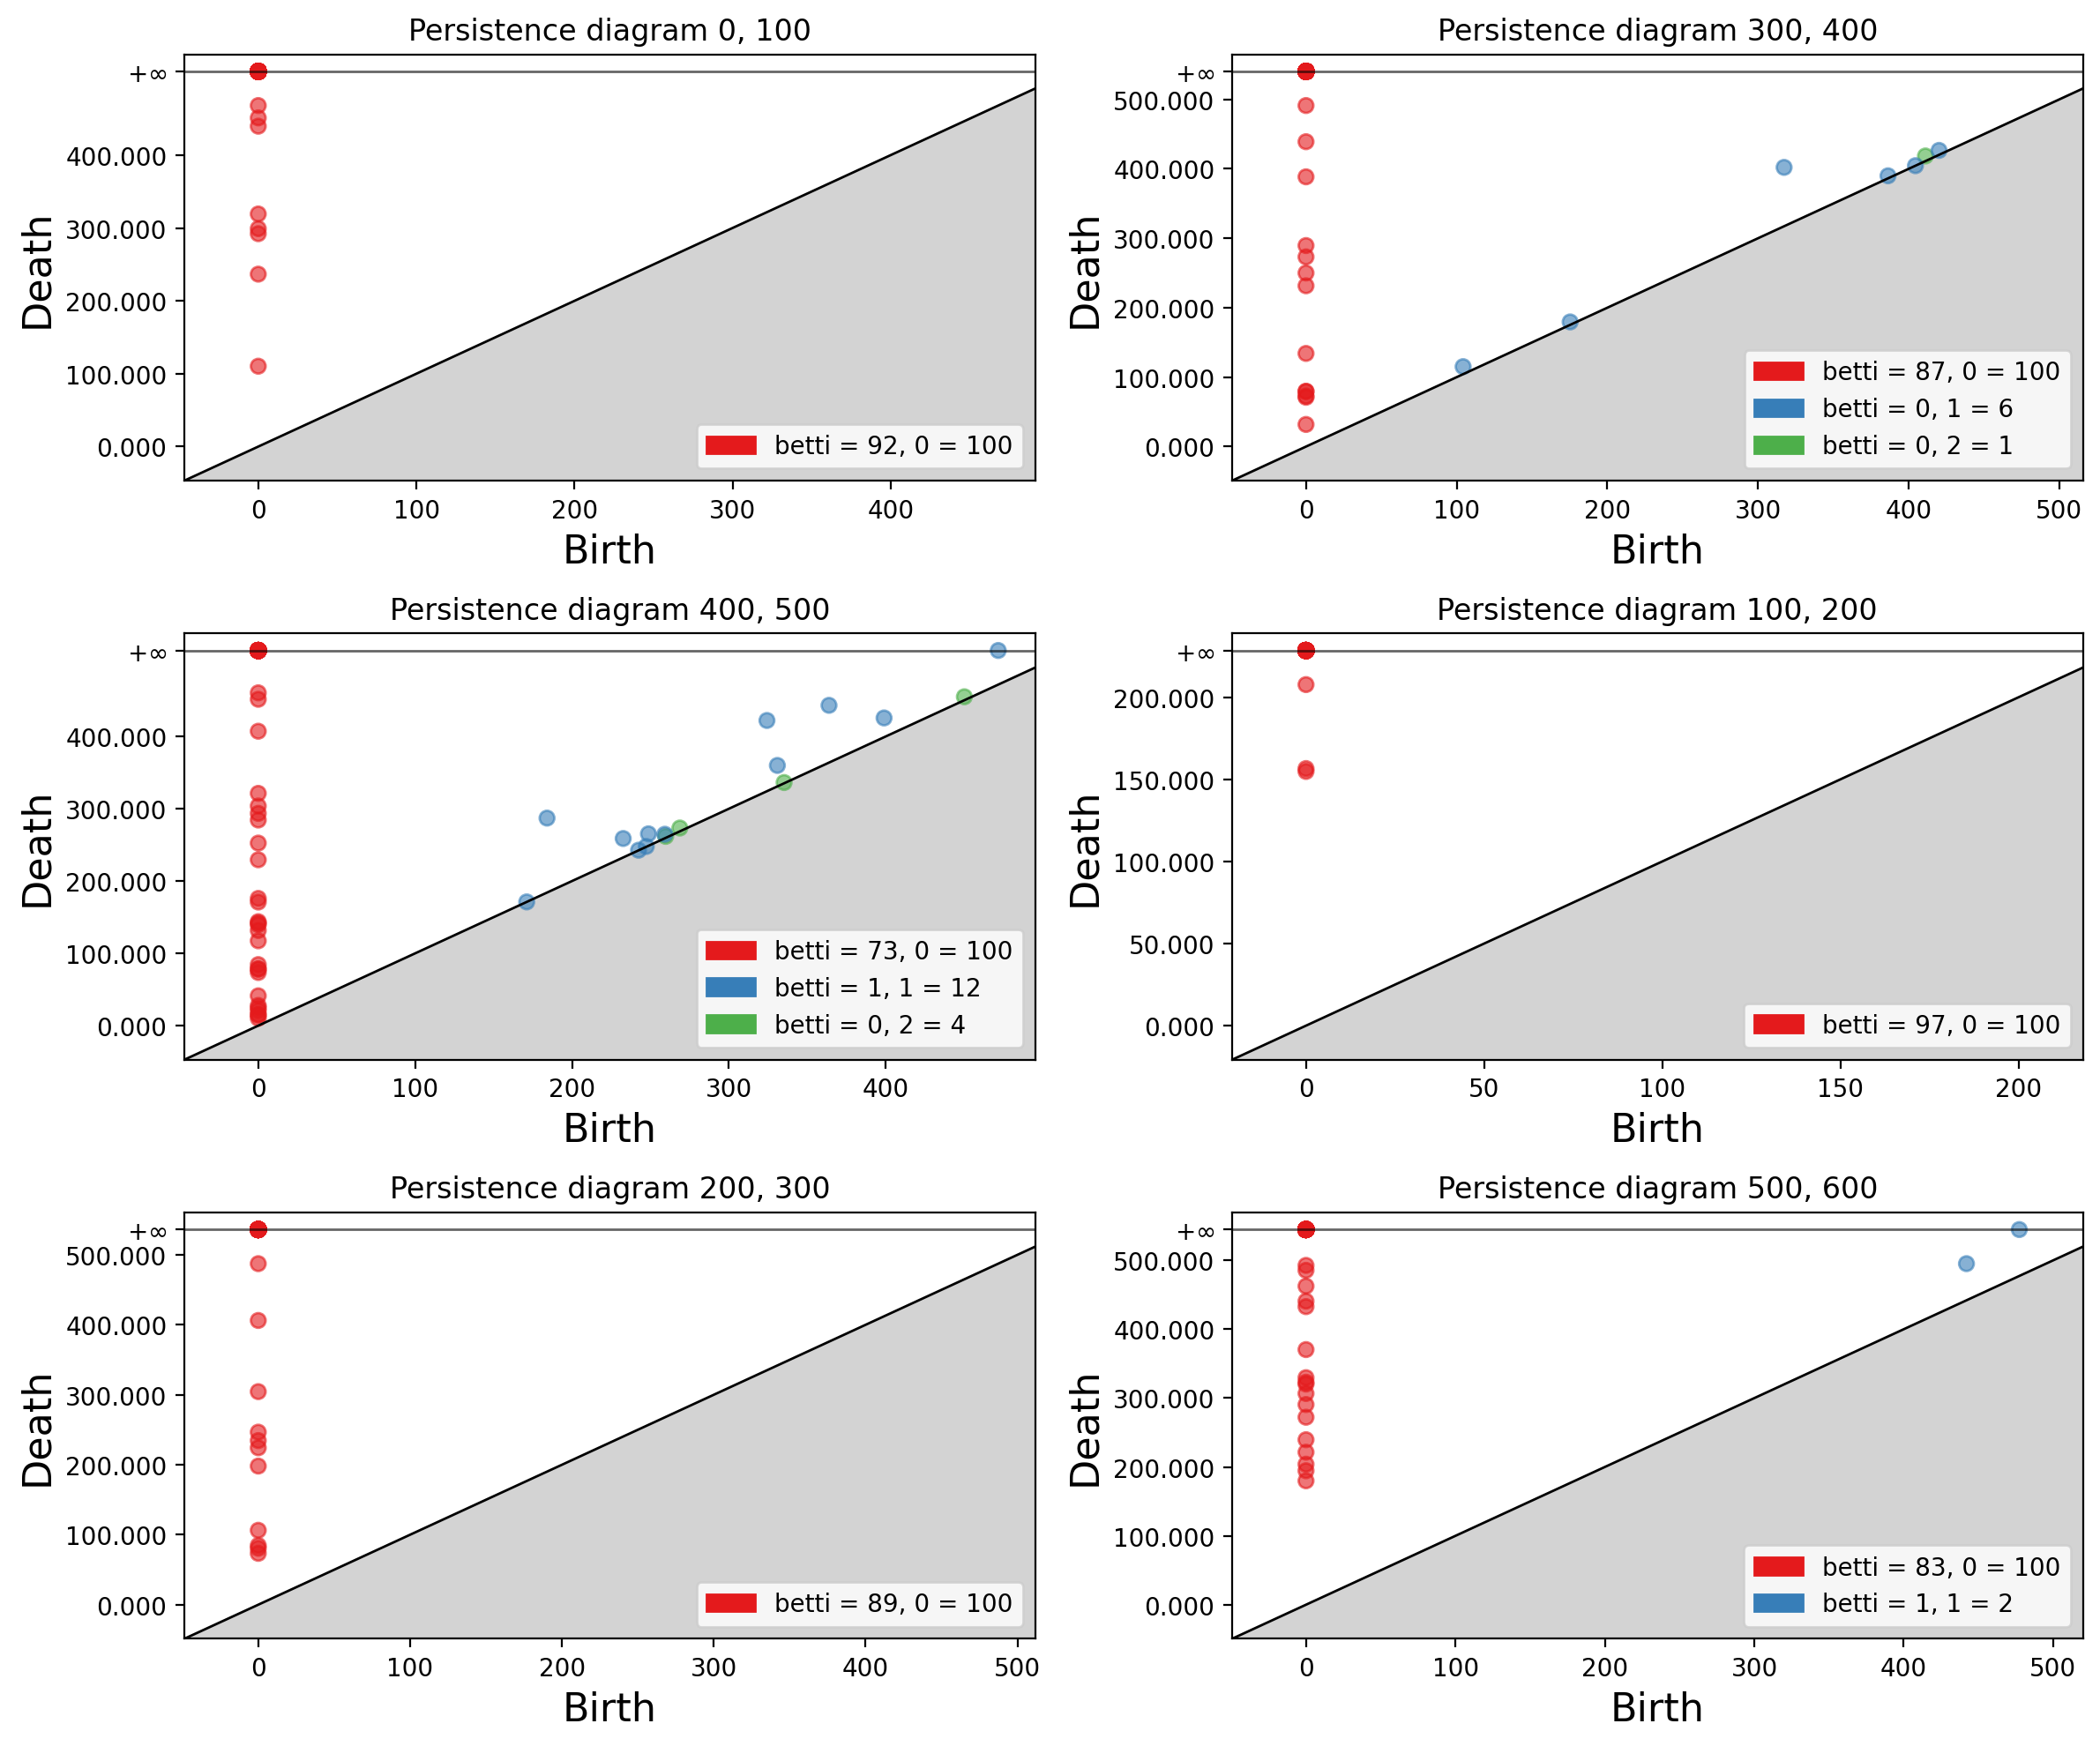

In [11]:
fig, axs = plt.subplots(3, 2, figsize = (12,10))
colormap = plt.cm.Set1.colors
points_d = np.vstack([x_redu, y_redu, z_redu]).reshape(662, 3)
for ini, f in zip(initial, final):
    # fig, axs = plt.subplots(3, 2)

    # print(points_d.shape)
    batch = points_d[ini:f, :]

    ac = gudhi.AlphaComplex(points = batch)

    simplex_tree = ac.create_simplex_tree(max_alpha_square = 500)
    print('Alpha complex is of dimension ', simplex_tree.dimension(), ' - ',
    simplex_tree.num_simplices(), ' simplices - ', simplex_tree.num_vertices(), ' vertices.')

    diag = simplex_tree.persistence()

    print("betti_numbers = %s"%(simplex_tree.betti_numbers()))

    counts = np.unique(np.array([dim for (dim, (birth, death)) in diag]), return_counts=True)
    gudhi.plot_persistence_diagram(diag, axes = axs[(ini//100)%3, (ini//100)%2])
    axs[(ini//100)%3, (ini//100)%2].set_title("Persistence diagram %s, %s"%((ini,f)))


    message = "Number of simplices=" + repr(simplex_tree.num_simplices())
    print(message)

    dimensions = {item[0] for item in diag}
    axs[(ini//100)%3, (ini//100)%2].legend(
    handles=[mpatches.Patch(color=colormap[dim], 
                            label= "betti = %s, %s = %s"%(simplex_tree.betti_numbers()[dim], dim, counts[1][dim])) for dim in dimensions], 
                            loc="best")

fig.tight_layout()
fig.show()


Alpha complex is of dimension  2  -  128  simplices -  100  vertices.
betti_numbers = [80, 0]
Number of simplices=128
Alpha complex is of dimension  2  -  114  simplices -  100  vertices.
betti_numbers = [88, 0]
Number of simplices=114
Alpha complex is of dimension  2  -  128  simplices -  100  vertices.
betti_numbers = [78, 0]
Number of simplices=128
Alpha complex is of dimension  3  -  159  simplices -  100  vertices.
betti_numbers = [80, 1, 0]
Number of simplices=159
Alpha complex is of dimension  3  -  361  simplices -  100  vertices.
betti_numbers = [62, 1, 0]
Number of simplices=361
Alpha complex is of dimension  3  -  164  simplices -  100  vertices.
betti_numbers = [69, 3, 0]
Number of simplices=164


/tmp/ipykernel_3960/3458602473.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


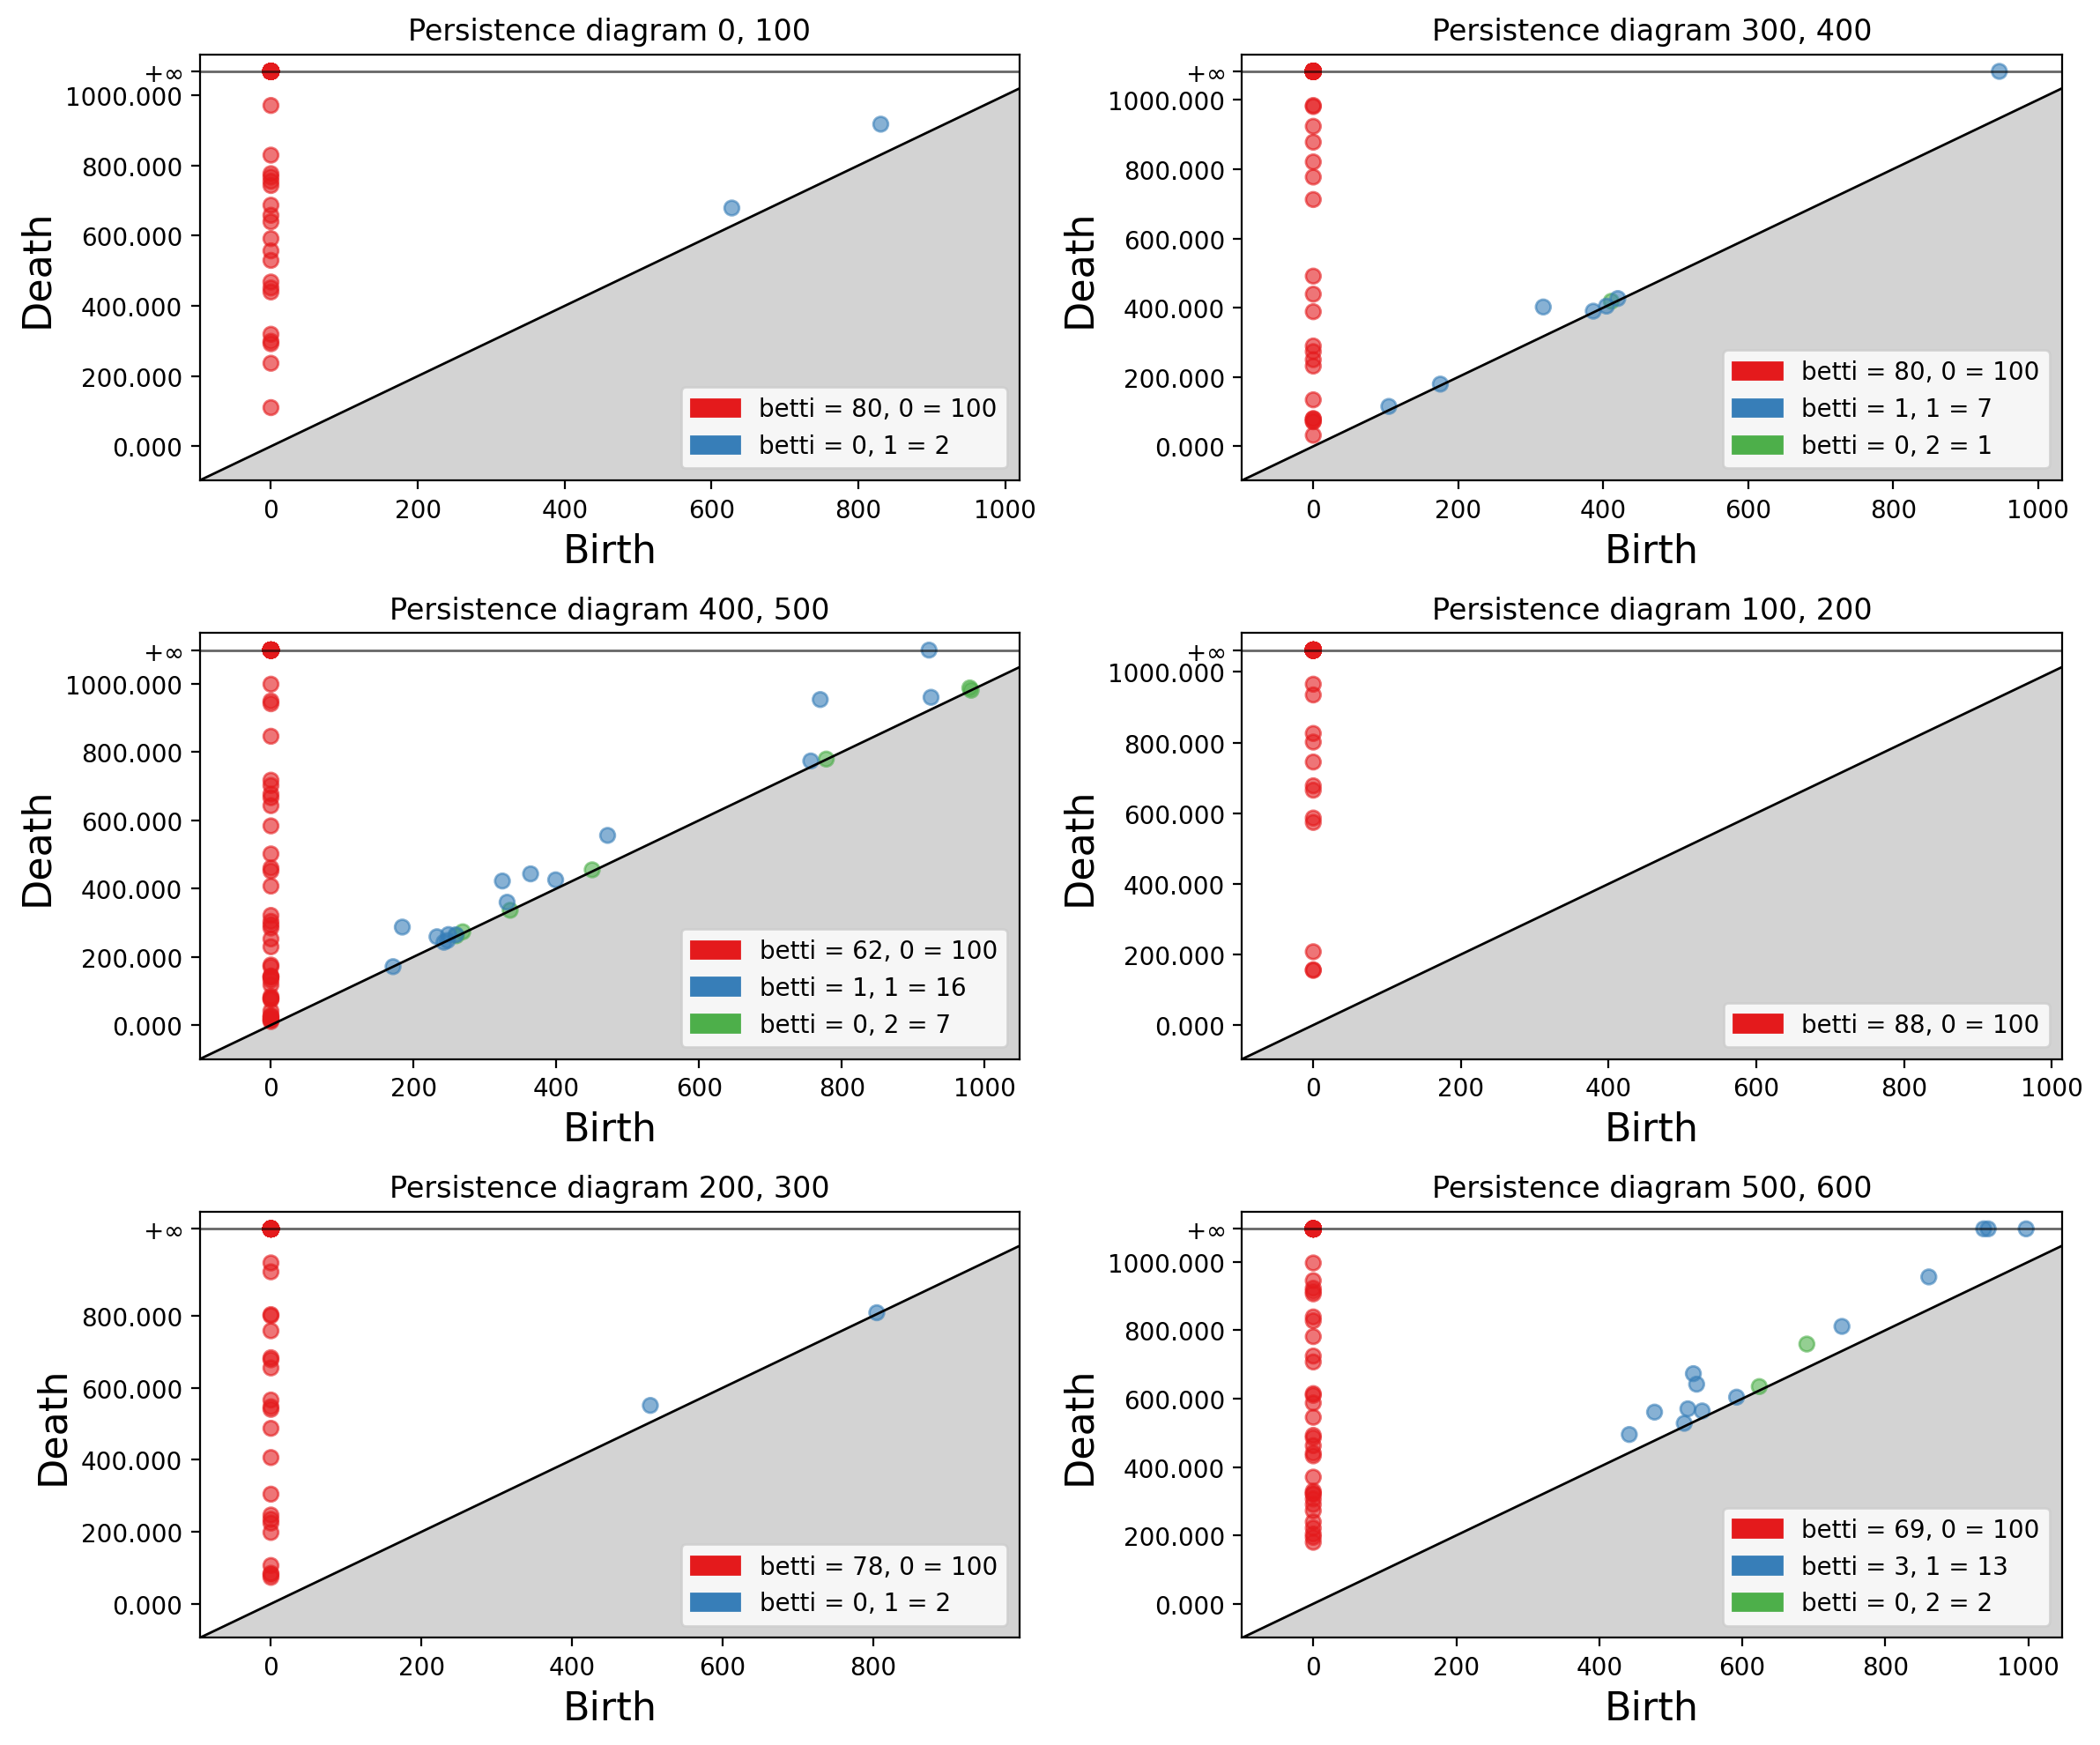

In [12]:
fig, axs = plt.subplots(3, 2, figsize = (12,10))
colormap = plt.cm.Set1.colors
points_d = np.vstack([x_redu, y_redu, z_redu]).reshape(662, 3)
for ini, f in zip(initial, final):
    # fig, axs = plt.subplots(3, 2)

    # print(points_d.shape)
    batch = points_d[ini:f, :]

    ac = gudhi.AlphaComplex(points = batch)

    simplex_tree = ac.create_simplex_tree(max_alpha_square = 1000)
    print('Alpha complex is of dimension ', simplex_tree.dimension(), ' - ',
    simplex_tree.num_simplices(), ' simplices - ', simplex_tree.num_vertices(), ' vertices.')

    diag = simplex_tree.persistence()

    print("betti_numbers = %s"%(simplex_tree.betti_numbers()))

    counts = np.unique(np.array([dim for (dim, (birth, death)) in diag]), return_counts=True)
    gudhi.plot_persistence_diagram(diag, axes = axs[(ini//100)%3, (ini//100)%2])
    axs[(ini//100)%3, (ini//100)%2].set_title("Persistence diagram %s, %s"%((ini,f)))


    message = "Number of simplices=" + repr(simplex_tree.num_simplices())
    print(message)

    dimensions = {item[0] for item in diag}
    axs[(ini//100)%3, (ini//100)%2].legend(
    handles=[mpatches.Patch(color=colormap[dim], 
                            label= "betti = %s, %s = %s"%(simplex_tree.betti_numbers()[dim], dim, counts[1][dim])) for dim in dimensions], 
                            loc="best")

fig.tight_layout()
fig.show()


In [10]:
# x = np.linspace(0,10,662)
# y = np.linspace(1,11,662)
# z = np.linspace(2,12,662)

# initial = [0, 100, 200, 300, 400, 500]
# final = [100, 200, 300, 400, 500, 600]
# points_d = []
# for ix, fx in zip(initial, final):
#     for iy, fy in zip(initial, final):
#         for iz, fz in zip(initial, final):
#             xx = x.copy()[ix:fx]
#             yy = y.copy()[iy:fy]
#             zz = z.copy()[iz:fz]

#             points_d.append(np.vstack([xx, yy, zz]).reshape(len(xx), 3))



In [11]:
# len(points_d)

In [13]:
diag = []
trees = []
colormap = plt.cm.Set1.colors
for ix, fx in zip(initial, final):
    for iy, fy in zip(initial, final):
        for iz, fz in zip(initial, final):
            
            xx = x_redu.copy()[ix:fx]
            yy = y_redu.copy()[iy:fy]
            zz = z_redu.copy()[iz:fz]

            points_d = np.vstack([xx, yy, zz]).reshape(len(xx), 3)
            ac = gudhi.AlphaComplex(points = points_d)

            simplex_tree = ac.create_simplex_tree(max_alpha_square = 200)
            diag_1 = simplex_tree.persistence()
            # print("betti_numbers() = %s"%(simplex_tree.betti_numbers()))

            trees.append(simplex_tree)
            # betti.append(simplex_tree.betti_numbers())
            diag.append(diag_1)


In [13]:
len(diag)

216

In [14]:

# Save the list to a file using pickle
# with open('digrams_more.pkl', 'wb') as file:
#     pickle.dump(diag, file)



In [15]:
# with open('simplex_trees_more.pkl', 'wb') as file:
#     pickle.dump(trees, file)

In [16]:
# with open('simplex_trees_more.pkl', 'rb') as file:
#     loaded_list = pickle.load(file)

In [17]:
# loaded_list[0].compute_persistence()
# loaded_list[0].betti_numbers()

[88, 0, 0]

In [18]:
# betti = []

In [19]:
# for tt in loaded_list:
#     tt.compute_persistence()
#     betti.append(tt.betti_numbers())

In [20]:
# betti_1 = []
# for tt in trees[:20]:
#     betti_1.append(tt.betti_numbers()) 

# betti_2 = []
# for tt in trees[20:40]:
#     betti_2.append(tt.betti_numbers()) 

# for tt in trees[40:60]:
#     betti_2.append(tt.betti_numbers()) 

# for tt in trees[60:80]:
#     betti.append(tt.betti_numbers())    

# for tt in trees[80:100]:
#     betti.append(tt.betti_numbers()) 

# for tt in trees[100:120]:
#     betti.append(tt.betti_numbers()) 

# for tt in trees[120:140]:
#     betti.append(tt.betti_numbers()) 

# for tt in trees[140:160]:
#     betti.append(tt.betti_numbers()) 

# for tt in trees[160:180]:
#     betti.append(tt.betti_numbers()) 

# for tt in trees[180:200]:
#     betti.append(tt.betti_numbers()) 

# for tt in trees[200:]:
#     betti.append(tt.betti_numbers()) 

In [21]:
# betti_1

In [14]:
len(diag)

216

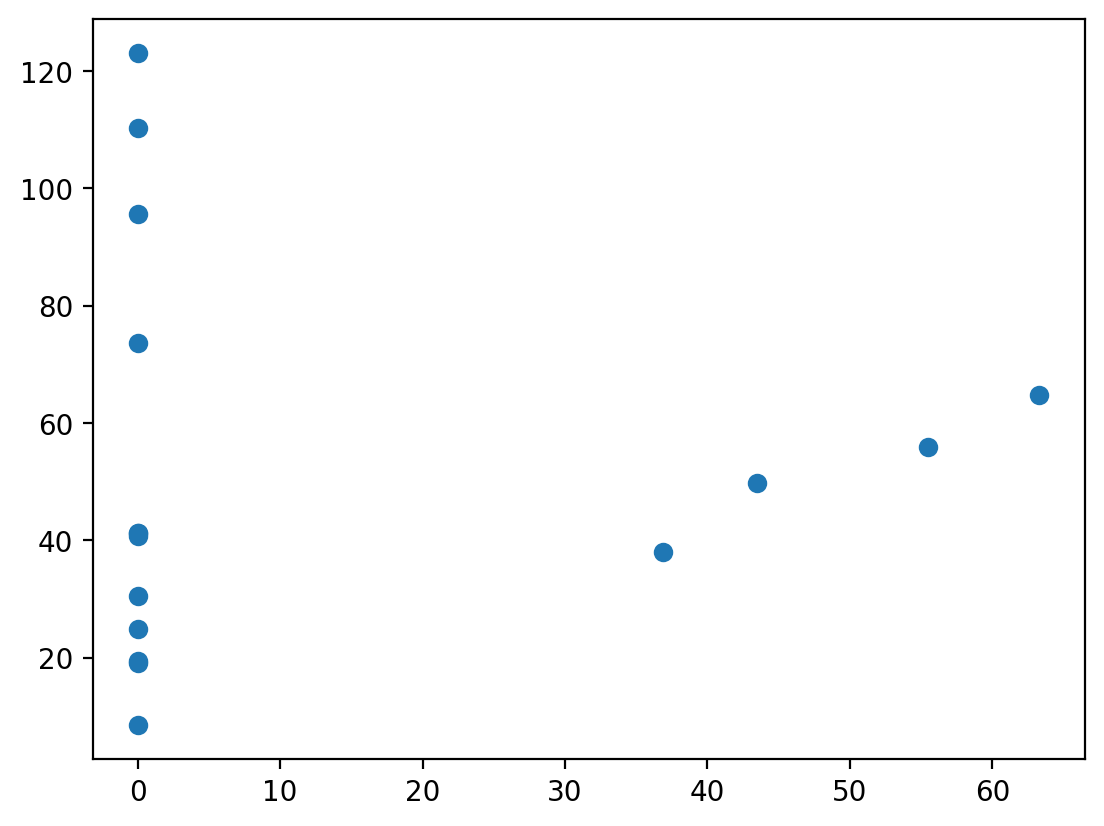

In [15]:
xt = np.array([(birth, death) for (dim, (birth, death)) in diag[0]])[:,0]
yt = np.array([(birth, death) for (dim, (birth, death)) in diag[0]])[:,1]

plt.scatter(xt,yt)

/tmp/ipykernel_3960/4038607405.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


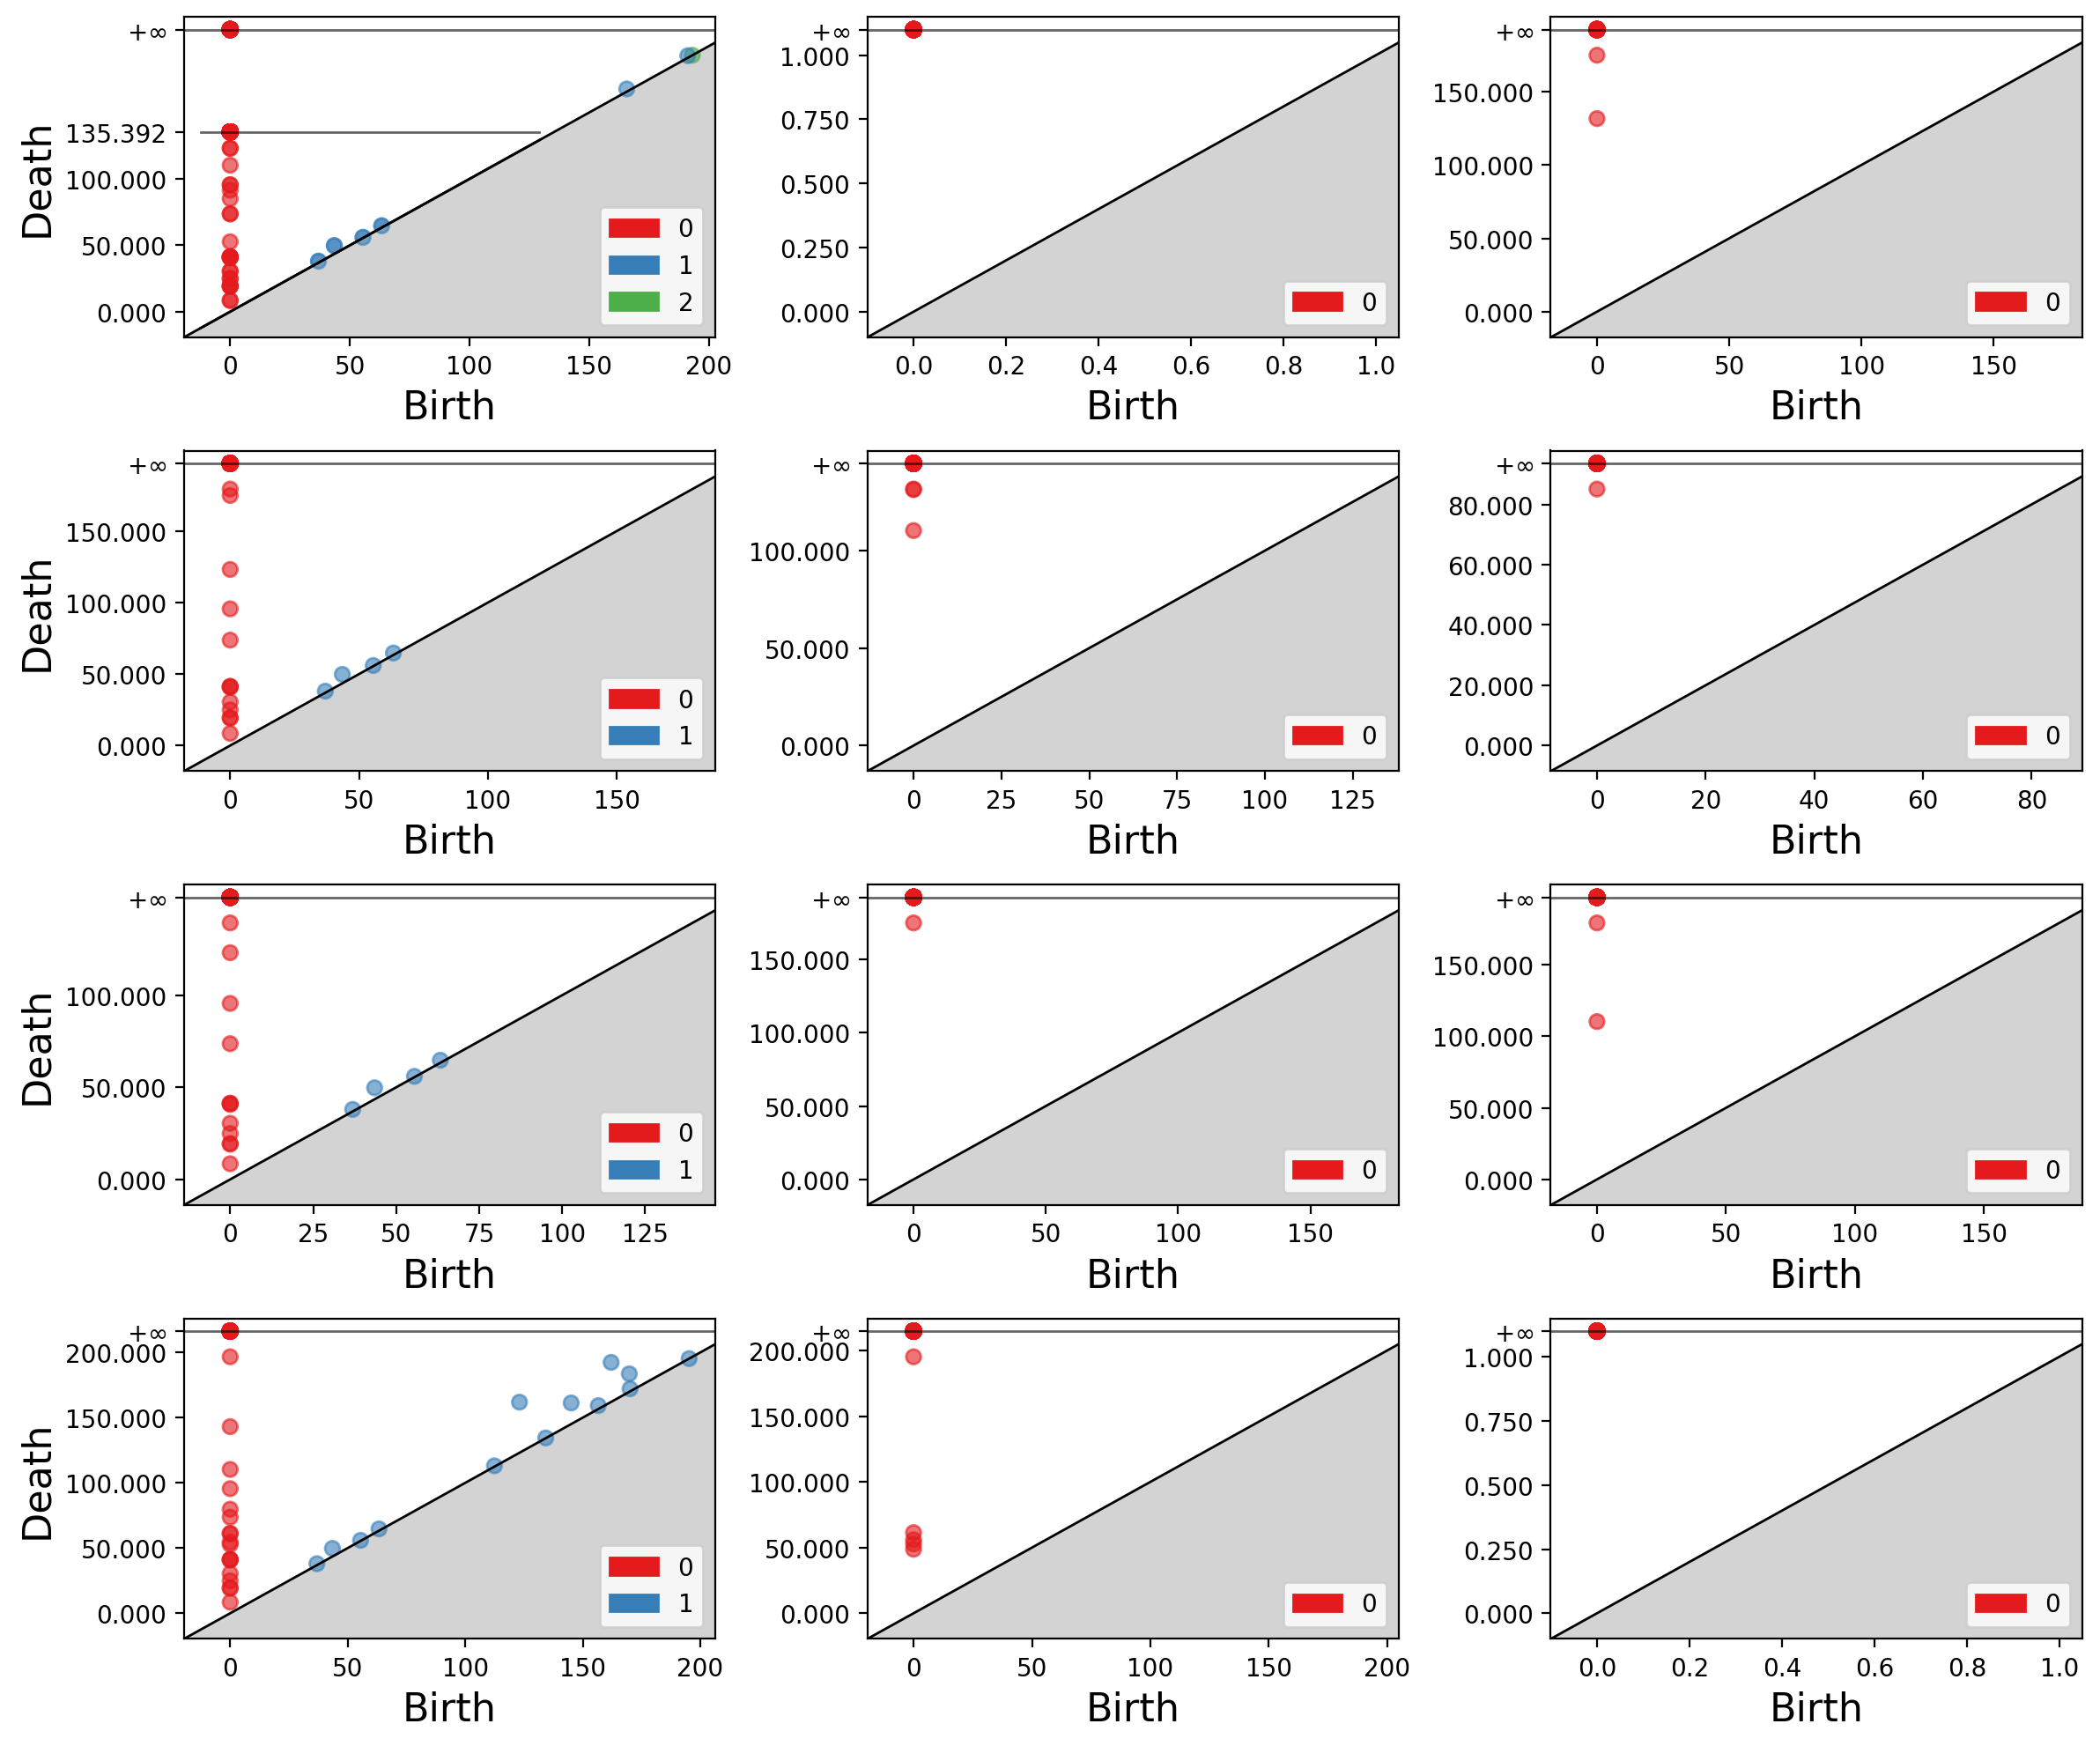

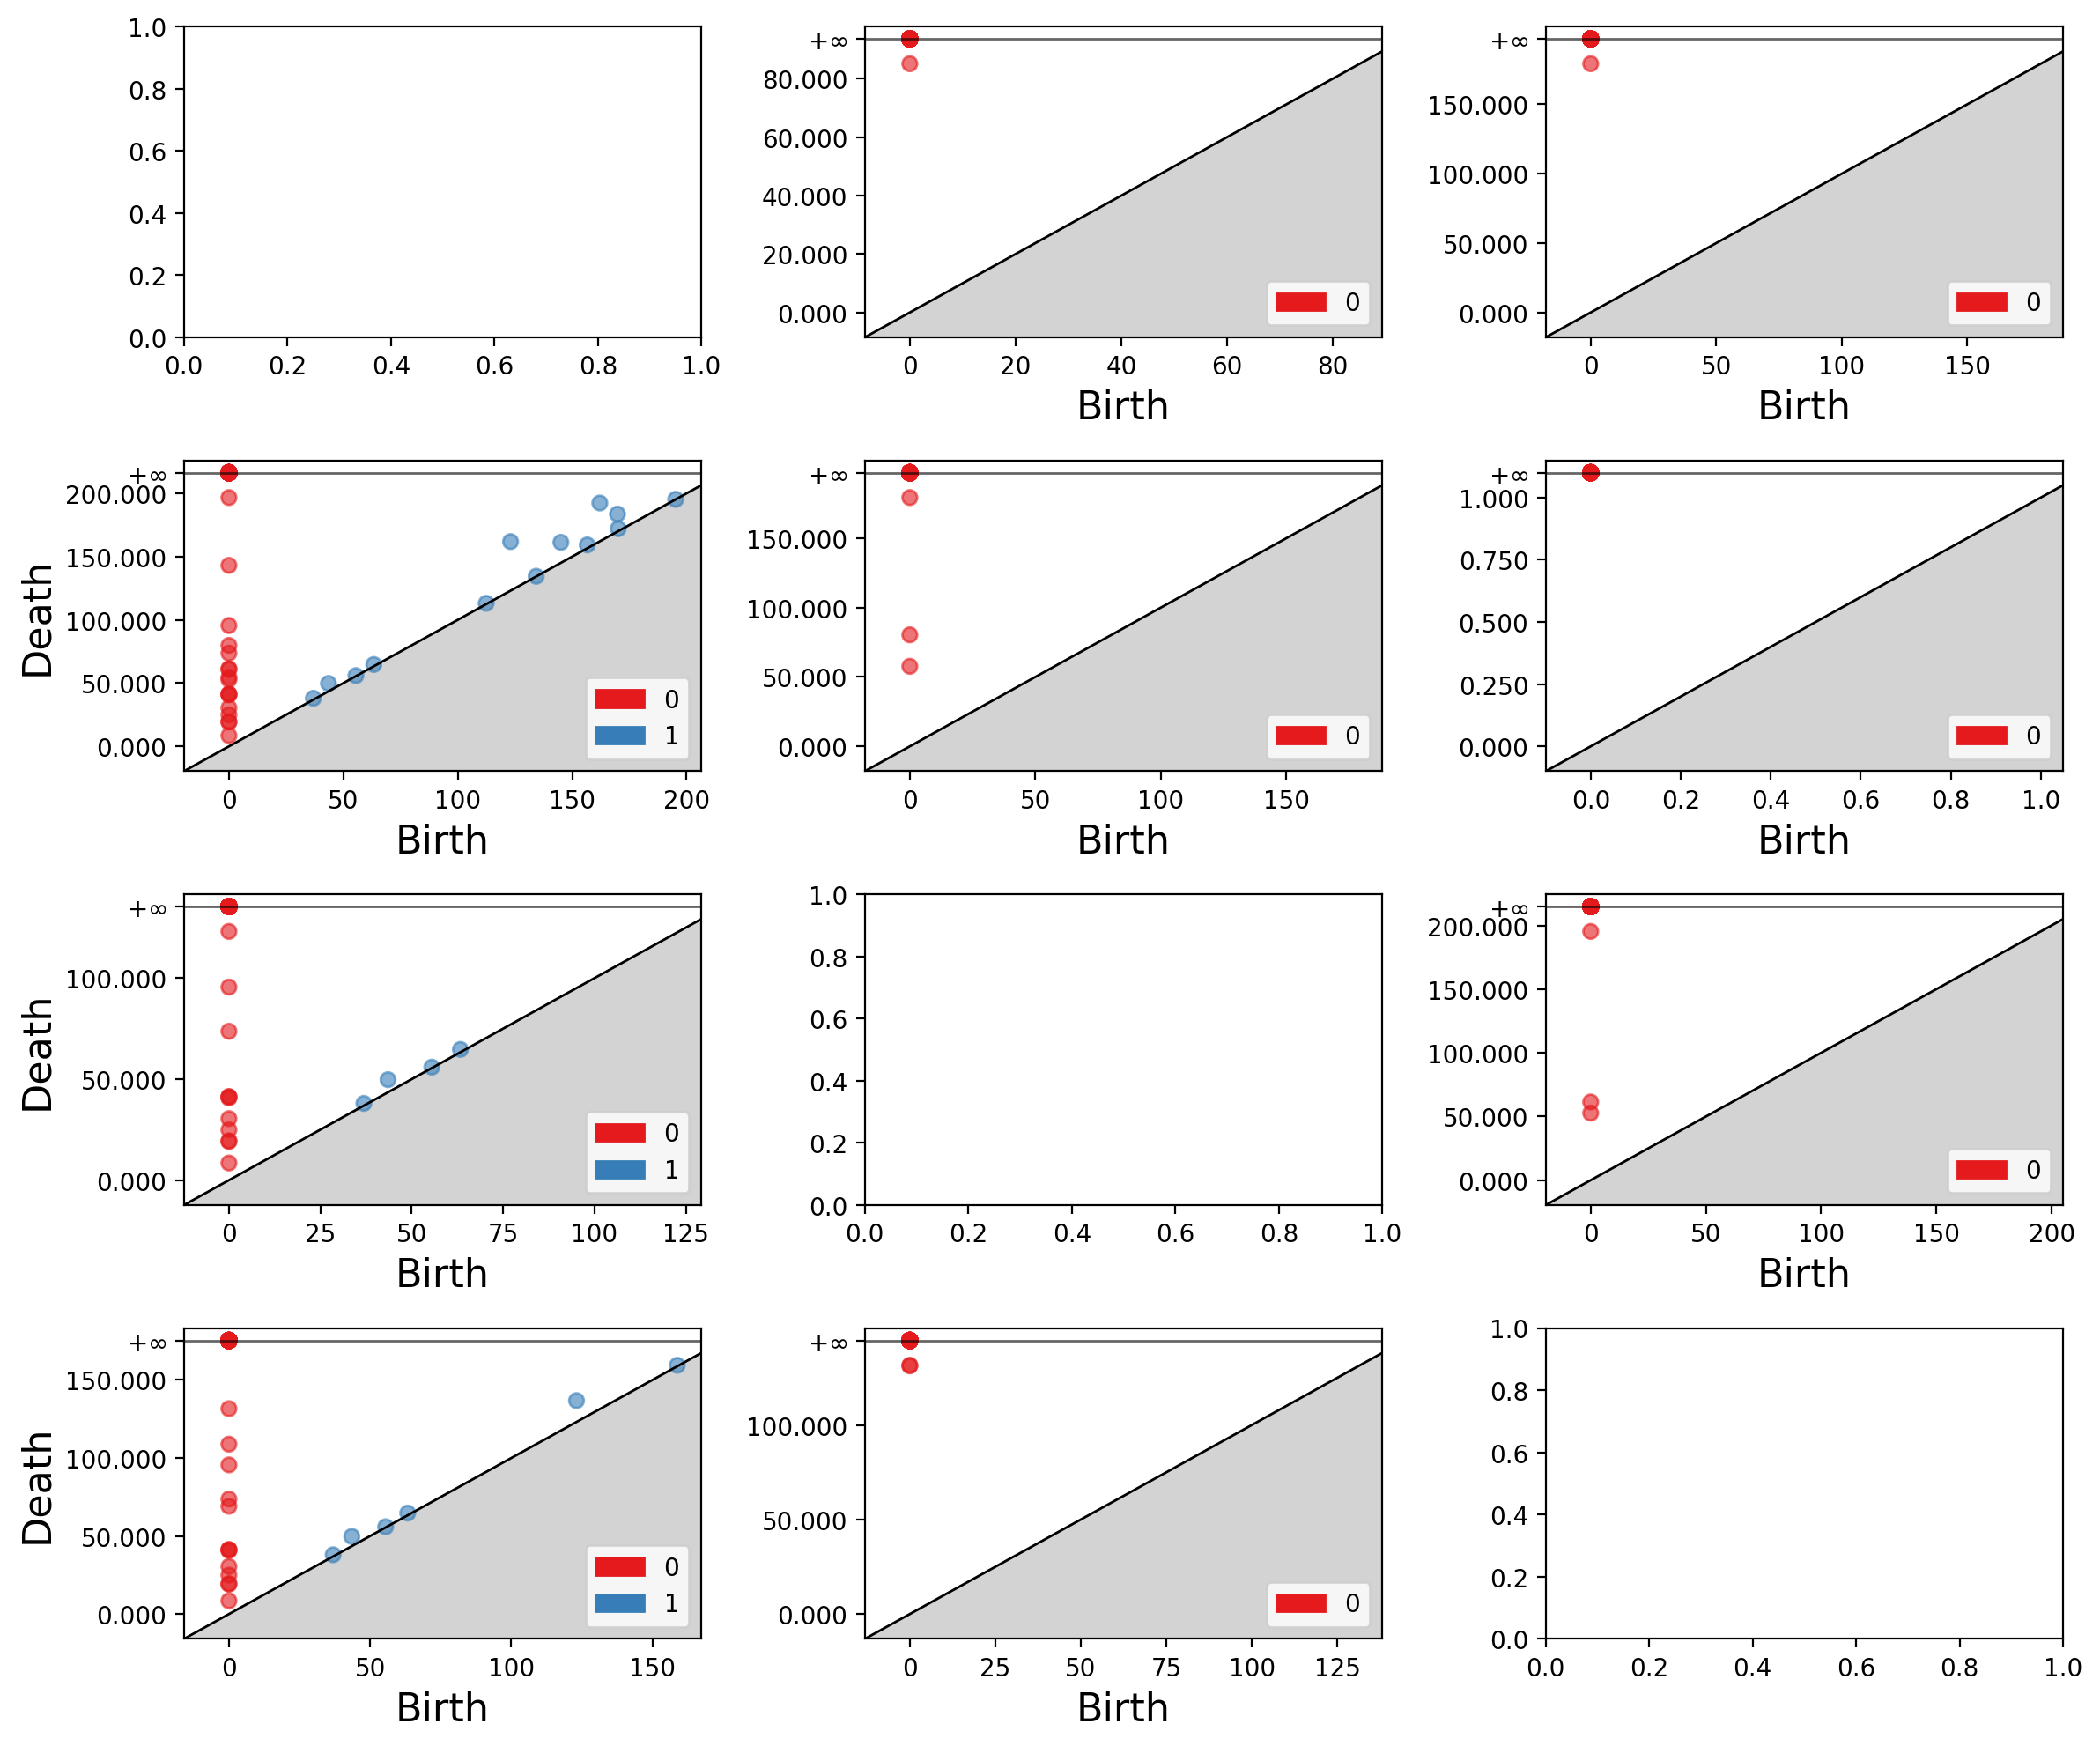

In [16]:
fig, ax = plt.subplots(4,3, figsize = (12, 10))
for ii, d in enumerate(diag[::10]):
    # print(ii%4, ii%3)
    gudhi.plot_persistence_diagram(d, axes = ax[ii%4, ii%3])
    ax[ii%4, ii%3].set_title("")
    if ((ii%3 == 1) or (ii%3 == 2)):
        ax[ii%4, ii%3].set_ylabel("")
    plt.tight_layout()
    
    if (ii%12 == 0) and (ii != 0):
        fig, ax = plt.subplots(4,3, figsize = (12, 10))
        ax[ii%4, ii%3].set_title("")

        if ((ii%3 == 1) or (ii%3 == 2)):
            ax[ii%4, ii%3].set_ylabel("")
        plt.tight_layout()



